# Author :Vikas Shahu

## Task1 Prediction using supervised machine learning


## GRIP @ The Sparks Foundation

In this regression problem our task is to predict the student score which is a dependent variable from Number of hours the student studied which is independent variable. Since there are only two variable linear regression is good to use.

In [4]:
#importing all necessary libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

## step1  reading data from source

In [5]:
import pandas as pd
data = pd.read_csv('https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv')

In [6]:
data.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


#### step2 data visualization

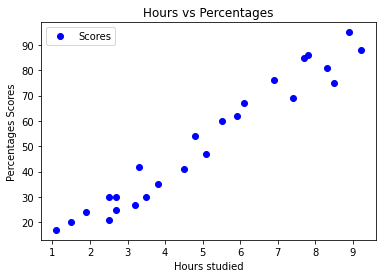

In [14]:
data.plot(x='Hours', y='Scores',color='blue',style='o')
plt.title("Hours vs Percentages")
plt.xlabel('Hours studied')
plt.ylabel('Percentages Scores')
plt.show()

#### from graph we can see the Scores and Hours are positively correlated but still we need to see whether they are statixtically correlated or not

In [16]:
np.corrcoef(data.Hours,data.Scores)

array([[1.        , 0.97619066],
       [0.97619066, 1.        ]])

#### since r=0.9761 which is greater than 0.75, we can say that scores is having strong positive relation with no. hours study

## step 3 Data preprocessing

In [72]:
X = data.iloc[:,0].values

In [67]:
data.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [74]:
Y=data.iloc[:,1].values

In [73]:
X

array([2.5, 5.1, 3.2, 8.5, 3.5, 1.5, 9.2, 5.5, 8.3, 2.7, 7.7, 5.9, 4.5,
       3.3, 1.1, 8.9, 2.5, 1.9, 6.1, 7.4, 2.7, 4.8, 3.8, 6.9, 7.8])

In [75]:
Y

array([21, 47, 27, 75, 30, 20, 88, 60, 81, 25, 85, 62, 41, 42, 17, 95, 30,
       24, 67, 69, 30, 54, 35, 76, 86], dtype=int64)

In [76]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=0)

In [77]:
X_train

array([3.8, 1.9, 7.8, 6.9, 1.1, 5.1, 7.7, 3.3, 8.3, 9.2, 6.1, 3.5, 2.7,
       5.5, 2.7, 8.5, 2.5, 4.8, 8.9, 4.5])

In [78]:
X_test

array([1.5, 3.2, 7.4, 2.5, 5.9])

In [79]:
Y_train

array([35, 24, 86, 76, 17, 47, 85, 42, 81, 88, 67, 30, 25, 60, 30, 75, 21,
       54, 95, 41], dtype=int64)

In [80]:
Y_test

array([20, 27, 69, 30, 62], dtype=int64)

## step 4 Model training

In [81]:
regressor = LinearRegression()
regressor.fit(X_train.reshape(-1,1),Y_train)
print("Training complete.")

Training complete.


## step 5 plotting best fit least square line

####  y= bx+ a


In [82]:
b = regressor.coef_
a = regressor.intercept_

In [83]:
line = b*X + a

In [84]:
line

array([26.79480124, 52.56250809, 33.73226078, 86.25874013, 36.70545772,
       16.88414476, 93.19619966, 56.52677068, 84.27660883, 28.77693254,
       78.33021494, 60.49103328, 46.6161142 , 34.72332643, 12.91988217,
       90.22300272, 26.79480124, 20.84840735, 62.47316457, 75.357018  ,
       28.77693254, 49.58931115, 39.67865467, 70.40168976, 79.32128059])

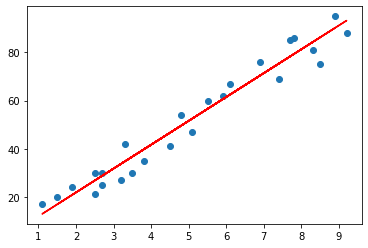

In [85]:
plt.scatter(X,Y)
plt.plot(X,line,color='red')
plt.show()

## step 6 Making predictions 

In [150]:
y_pred = regressor.predict(X_test.reshape(-1, 1))
df = pd.DataFrame()

In [156]:
predicted = []
for i in y_pred:
    predicted.append(round(i,2))

In [157]:
df['no._of_hours_studied'] = pd.Series(X_test)

In [158]:
df['Actual_score'] = pd.Series(Y_test)

In [159]:
df['Predicted_score'] = pd.Series(predicted)

In [160]:
df

,no._of_hours_studied,Actual_score,Predicted_score
0,1.5,20,16.88
1,3.2,27,33.73
2,7.4,69,75.36
3,2.5,30,26.79
4,5.9,62,60.49


In [178]:
hours = np.array([8.5])
score = regressor.predict(hours.reshape(1,-1))
print(score)

[86.25874013]


In [169]:
df1=pd.DataFrame()
df1['Actual_score'] = pd.Series(Y_test)
df1['Predicted_score'] = pd.Series(predicted)


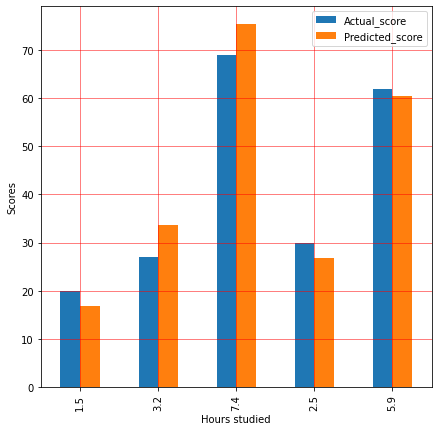

In [174]:
df1.plot(kind='bar',figsize=(7,7))
plt.grid(which='major', linewidth='0.5', color='red')
plt.grid(which='minor', linewidth='0.5', color='green')
plt.xlabel('Hours studied')
plt.ylabel('Scores')
plt.xticks(ticks=[i for i in range(len(Y_test))], labels=X_test)
plt.show()

## step 7 calculating error

>20.0, 16.9 = 9.734
>27.0, 33.7 = 45.293
>69.0, 75.4 = 40.450
>30.0, 26.8 = 10.304
>62.0, 60.5 = 2.280


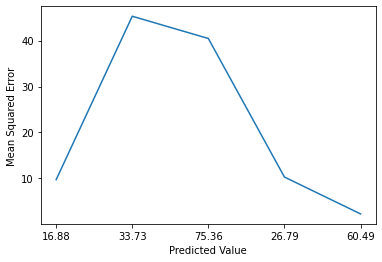

In [162]:
errors = []
for i in range(len(Y_test)):
    # calculate error
    err = (Y_test[i] - round(y_pred[i],2))**2
    # store error
    errors.append(err)
    # report error
    print('>%.1f, %.1f = %.3f' % (Y_test[i], round(y_pred[i],2), err))
# plot errors
plt.plot(errors)
plt.xticks(ticks=[i for i in range(len(errors))], labels=predicted)
plt.xlabel('Predicted Value')
plt.ylabel('Mean Squared Error')
plt.show()

## step 8 Evaluating Model


#### this is the most crucial step, in this step we predict how our model performed. If it performs badly than check data whether it is preprocessed correctly or not, if data is preprocessed correctly we can go for other models

In [182]:
from sklearn import metrics
print("Mean Absolute Error: ",metrics.mean_absolute_error(Y_test,y_pred))
print("Mean Squared Error : ",metrics.mean_squared_error(Y_test,y_pred))
print("Root Mean Squared Error : ",np.sqrt(metrics.mean_squared_error(Y_test,y_pred)))
print("R-2",metrics.r2_score(Y_test,y_pred))

Mean Absolute Error:  4.183859899002982
Mean Squared Error :  21.598769307217456
Root Mean Squared Error :  4.647447612100373
R-2 0.9454906892105354


## Conclusion

### linear regression performs well on given data. hours of study is strongly positively correlated with scores.

## Thank You